# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 4</span>

> **Note** Results shown below are simulated by means of the provided MD code improved as requested in Exercises $04.1$ and $04.2$

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


k_b=1.380649e-23  #J/K
a_m_u=1.66054e-27 #Kg

# Argon SI conversion

sigma_ar=0.34e-9 #m
epsilon_ar=120.*k_b #K
m_ar=39.948*a_m_u #Kg

# Krypton SI conversion

sigma_kr=0.364e-9 #m
epsilon_kr=164*k_b #K
m_kr=83.798*a_m_u #Kg

delta=0.0005

#conversion from lj timestep to real timestep
time_step_ar=delta*np.sqrt(m_ar*sigma_ar*sigma_ar/epsilon_ar)
time_step_kr=delta*np.sqrt(m_kr*sigma_kr*sigma_kr/epsilon_kr)
print("  Argon Timestep: " , time_step_ar, "\nKrypton Timestep: " , time_step_kr)

  Argon Timestep:  1.0756942530952399e-15 
Krypton Timestep:  1.4267547272160648e-15


### Exercise 04.4:

The simulation consisted in two parts:
- Equilibration: a total of 11 simulations with restart, each 500 MonteCarlo steps long are discarded as regarding the simulation of out of equilibrium system and thus not suitable for an estimation of the interested equilibrium properties.
- Measurement: i run a longer simulation ($10^4$ MonteCarlo steps) measuring equilibrium properties every 10 MonteCarlo steps. This last run last approximately 10ps for Argon and 14ps for krypton


I considered 100 blocks of 10 measures each for data analysis by means of the blocking method tecnique. 

1) **Argon NVE MD**

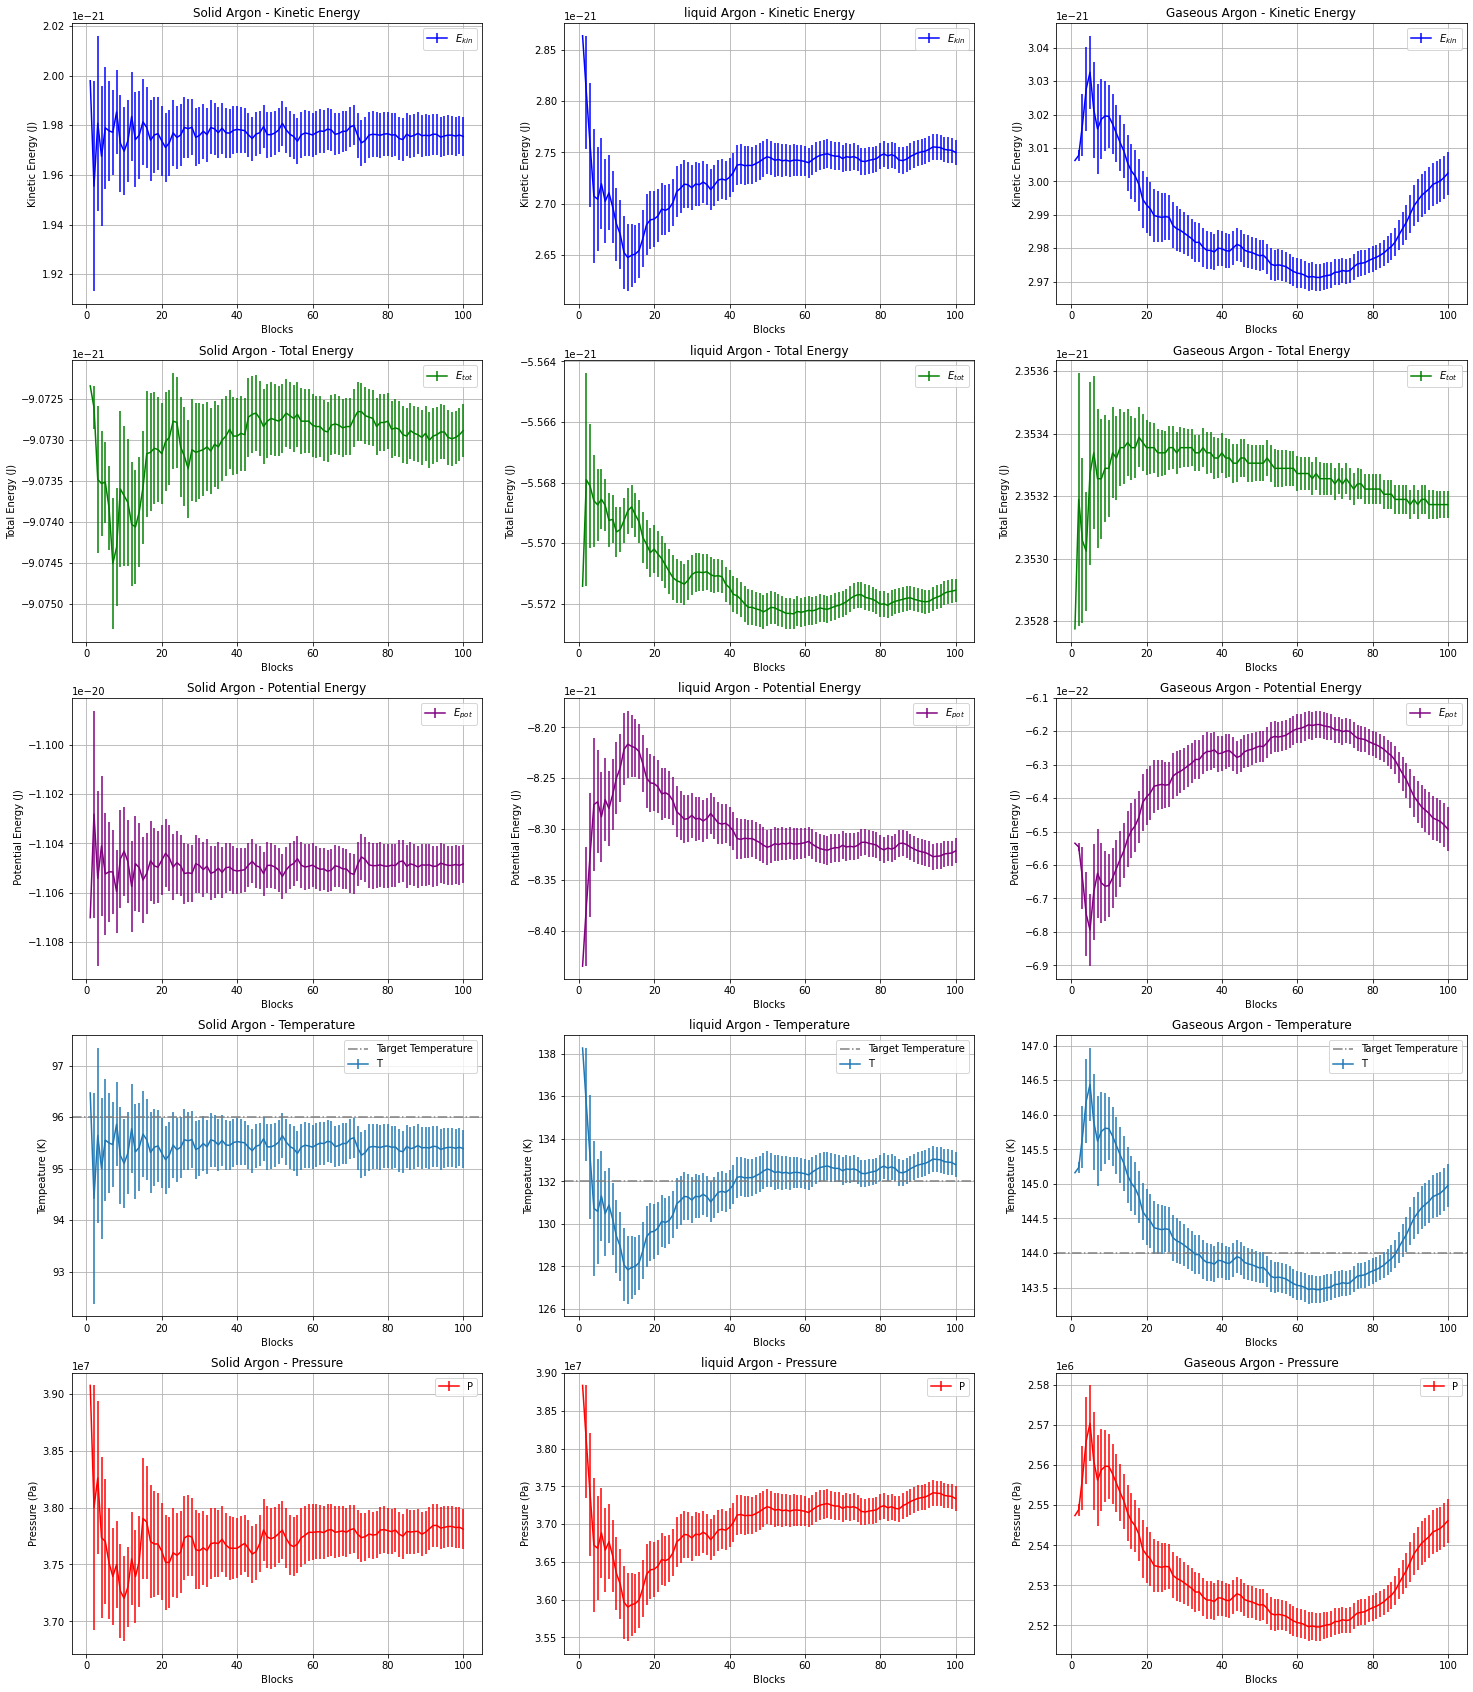

In [2]:
plt.figure(figsize=(25,30))

#================= solid argon
ave_ekin, error_ekin= np.loadtxt("solid/ave_ekin.dat", usecols=(1,2), delimiter=' ', unpack='true', skiprows=120)
ave_etot, error_etot= np.loadtxt("solid/ave_etot.dat", usecols=(1,2), delimiter=' ', unpack='true', skiprows=120)
ave_epot, error_epot= np.loadtxt("solid/ave_epot.dat", usecols=(1,2), delimiter=' ', unpack='true', skiprows=120)
ave_temp, error_temp= np.loadtxt("solid/ave_temp.dat", usecols=(1,2), delimiter=' ', unpack='true', skiprows=120)
ave_pres, error_pres= np.loadtxt("solid/ave_pres.dat", usecols=(1,2), delimiter=' ', unpack='true', skiprows=120)

x=np.linspace(1, len(ave_ekin), len(ave_ekin))

plt.subplot(531)
plt.title("Solid Argon - Kinetic Energy")
plt.errorbar(x, ave_ekin*epsilon_ar, yerr= error_ekin*epsilon_ar, label='$E_{kin}$', c='b')
plt.xlabel('Blocks')
plt.ylabel('Kinetic Energy (J)')
plt.legend()
plt.grid(True)

plt.subplot(534)
plt.title("Solid Argon - Total Energy")
plt.errorbar(x, ave_etot*epsilon_ar, yerr= error_etot*epsilon_ar, label='$E_{tot}$', c='g')
plt.xlabel('Blocks')
plt.ylabel('Total Energy (J)')
plt.legend()
plt.grid(True)

plt.subplot(537)
plt.title("Solid Argon - Potential Energy")
plt.errorbar(x, ave_epot*epsilon_ar, yerr= error_epot*epsilon_ar, label='$E_{pot}$', c='purple')
plt.xlabel('Blocks')
plt.ylabel(' Potential Energy (J)')
plt.legend()
plt.grid(True)

plt.subplot(5,3,10)
plt.title("Solid Argon - Temperature")
plt.errorbar(x, ave_temp*epsilon_ar/k_b, yerr= error_temp*epsilon_ar/k_b, label='T')
plt.axhline(0.8*epsilon_ar/k_b, color='gray', linestyle='-.', label='Target Temperature')
plt.xlabel('Blocks')
plt.ylabel('Tempeature (K)')
plt.legend()
plt.grid(True)

plt.subplot(5,3,13)
plt.title("Solid Argon - Pressure")
plt.errorbar(x, ave_pres*epsilon_ar/(sigma_ar**3), yerr= error_pres*epsilon_ar/(sigma_ar**3), label='P', c='r')
plt.xlabel('Blocks')
plt.ylabel('Pressure (Pa)')
plt.legend()
plt.grid(True)


#================= liquid argon
ave_ekin, error_ekin= np.loadtxt("liquid/ave_ekin.dat", usecols=(1,2), delimiter=' ', unpack='true', skiprows=120)
ave_etot, error_etot= np.loadtxt("liquid/ave_etot.dat", usecols=(1,2), delimiter=' ', unpack='true', skiprows=120)
ave_epot, error_epot= np.loadtxt("liquid/ave_epot.dat", usecols=(1,2), delimiter=' ', unpack='true', skiprows=120)
ave_temp, error_temp= np.loadtxt("liquid/ave_temp.dat", usecols=(1,2), delimiter=' ', unpack='true', skiprows=120)
ave_pres, error_pres= np.loadtxt("liquid/ave_pres.dat", usecols=(1,2), delimiter=' ', unpack='true', skiprows=120)

x=np.linspace(1, len(ave_ekin), len(ave_ekin))

plt.subplot(532)
plt.title("liquid Argon - Kinetic Energy")
plt.errorbar(x, ave_ekin*epsilon_ar, yerr= error_ekin*epsilon_ar, label='$E_{kin}$', c='b')
plt.xlabel('Blocks')
plt.ylabel('Kinetic Energy (J)')
plt.legend()
plt.grid(True)

plt.subplot(535)
plt.title("liquid Argon - Total Energy")
plt.errorbar(x, ave_etot*epsilon_ar, yerr= error_etot*epsilon_ar, label='$E_{tot}$', c='g')
plt.xlabel('Blocks')
plt.ylabel('Total Energy (J)')
plt.legend()
plt.grid(True)

plt.subplot(538)
plt.title("liquid Argon - Potential Energy")
plt.errorbar(x, ave_epot*epsilon_ar, yerr= error_epot*epsilon_ar, label='$E_{pot}$', c='purple')
plt.xlabel('Blocks')
plt.ylabel(' Potential Energy (J)')
plt.legend()
plt.grid(True)

plt.subplot(5,3,11)
plt.title("liquid Argon - Temperature")
plt.errorbar(x, ave_temp*epsilon_ar/k_b, yerr= error_temp*epsilon_ar/k_b, label='T')
plt.axhline(1.1*epsilon_ar/k_b, color='gray', linestyle='-.', label='Target Temperature')
plt.xlabel('Blocks')
plt.ylabel('Tempeature (K)')
plt.legend()
plt.grid(True)

plt.subplot(5,3,14)
plt.title("liquid Argon - Pressure")
plt.errorbar(x, ave_pres*epsilon_ar/(sigma_ar**3), yerr= error_pres*epsilon_ar/(sigma_ar**3), label='P', c='r')
plt.xlabel('Blocks')
plt.ylabel('Pressure (Pa)')
plt.legend()
plt.grid(True)

#================= Gaseous argon
ave_ekin, error_ekin= np.loadtxt("Gas/ave_ekin.dat", usecols=(1,2), delimiter=' ', unpack='true', skiprows=120)
ave_etot, error_etot= np.loadtxt("Gas/ave_etot.dat", usecols=(1,2), delimiter=' ', unpack='true', skiprows=120)
ave_epot, error_epot= np.loadtxt("Gas/ave_epot.dat", usecols=(1,2), delimiter=' ', unpack='true', skiprows=120)
ave_temp, error_temp= np.loadtxt("Gas/ave_temp.dat", usecols=(1,2), delimiter=' ', unpack='true', skiprows=120)
ave_pres, error_pres= np.loadtxt("Gas/ave_pres.dat", usecols=(1,2), delimiter=' ', unpack='true', skiprows=120)

x=np.linspace(1, len(ave_ekin), len(ave_ekin))

plt.subplot(533)
plt.title("Gaseous Argon - Kinetic Energy")
plt.errorbar(x, ave_ekin*epsilon_ar, yerr= error_ekin*epsilon_ar, label='$E_{kin}$', c='b')
plt.xlabel('Blocks')
plt.ylabel('Kinetic Energy (J)')
plt.legend()
plt.grid(True)

plt.subplot(536)
plt.title("Gaseous Argon - Total Energy")
plt.errorbar(x, ave_etot*epsilon_ar, yerr= error_etot*epsilon_ar, label='$E_{tot}$', c='g')
plt.xlabel('Blocks')
plt.ylabel('Total Energy (J)')
plt.legend()
plt.grid(True)

plt.subplot(539)
plt.title("Gaseous Argon - Potential Energy")
plt.errorbar(x, ave_epot*epsilon_ar, yerr= error_epot*epsilon_ar, label='$E_{pot}$', c='purple')
plt.xlabel('Blocks')
plt.ylabel(' Potential Energy (J)')
plt.legend()
plt.grid(True)

plt.subplot(5,3,12)
plt.title("Gaseous Argon - Temperature")
plt.errorbar(x, ave_temp*epsilon_ar/k_b, yerr= error_temp*epsilon_ar/k_b, label='T')
plt.axhline(1.2*epsilon_ar/k_b, color='gray', linestyle='-.', label='Target Temperature')
plt.xlabel('Blocks')
plt.ylabel('Tempeature (K)')
plt.legend()
plt.grid(True)

plt.subplot(5,3,15)
plt.title("Gaseous Argon - Pressure")
plt.errorbar(x, ave_pres*epsilon_ar/(sigma_ar**3), yerr= error_pres*epsilon_ar/(sigma_ar**3), label='P', c='r')
plt.xlabel('Blocks')
plt.ylabel('Pressure (Pa)')
plt.legend()
plt.grid(True)

plt.show()

2) **Krypton NVE MD**

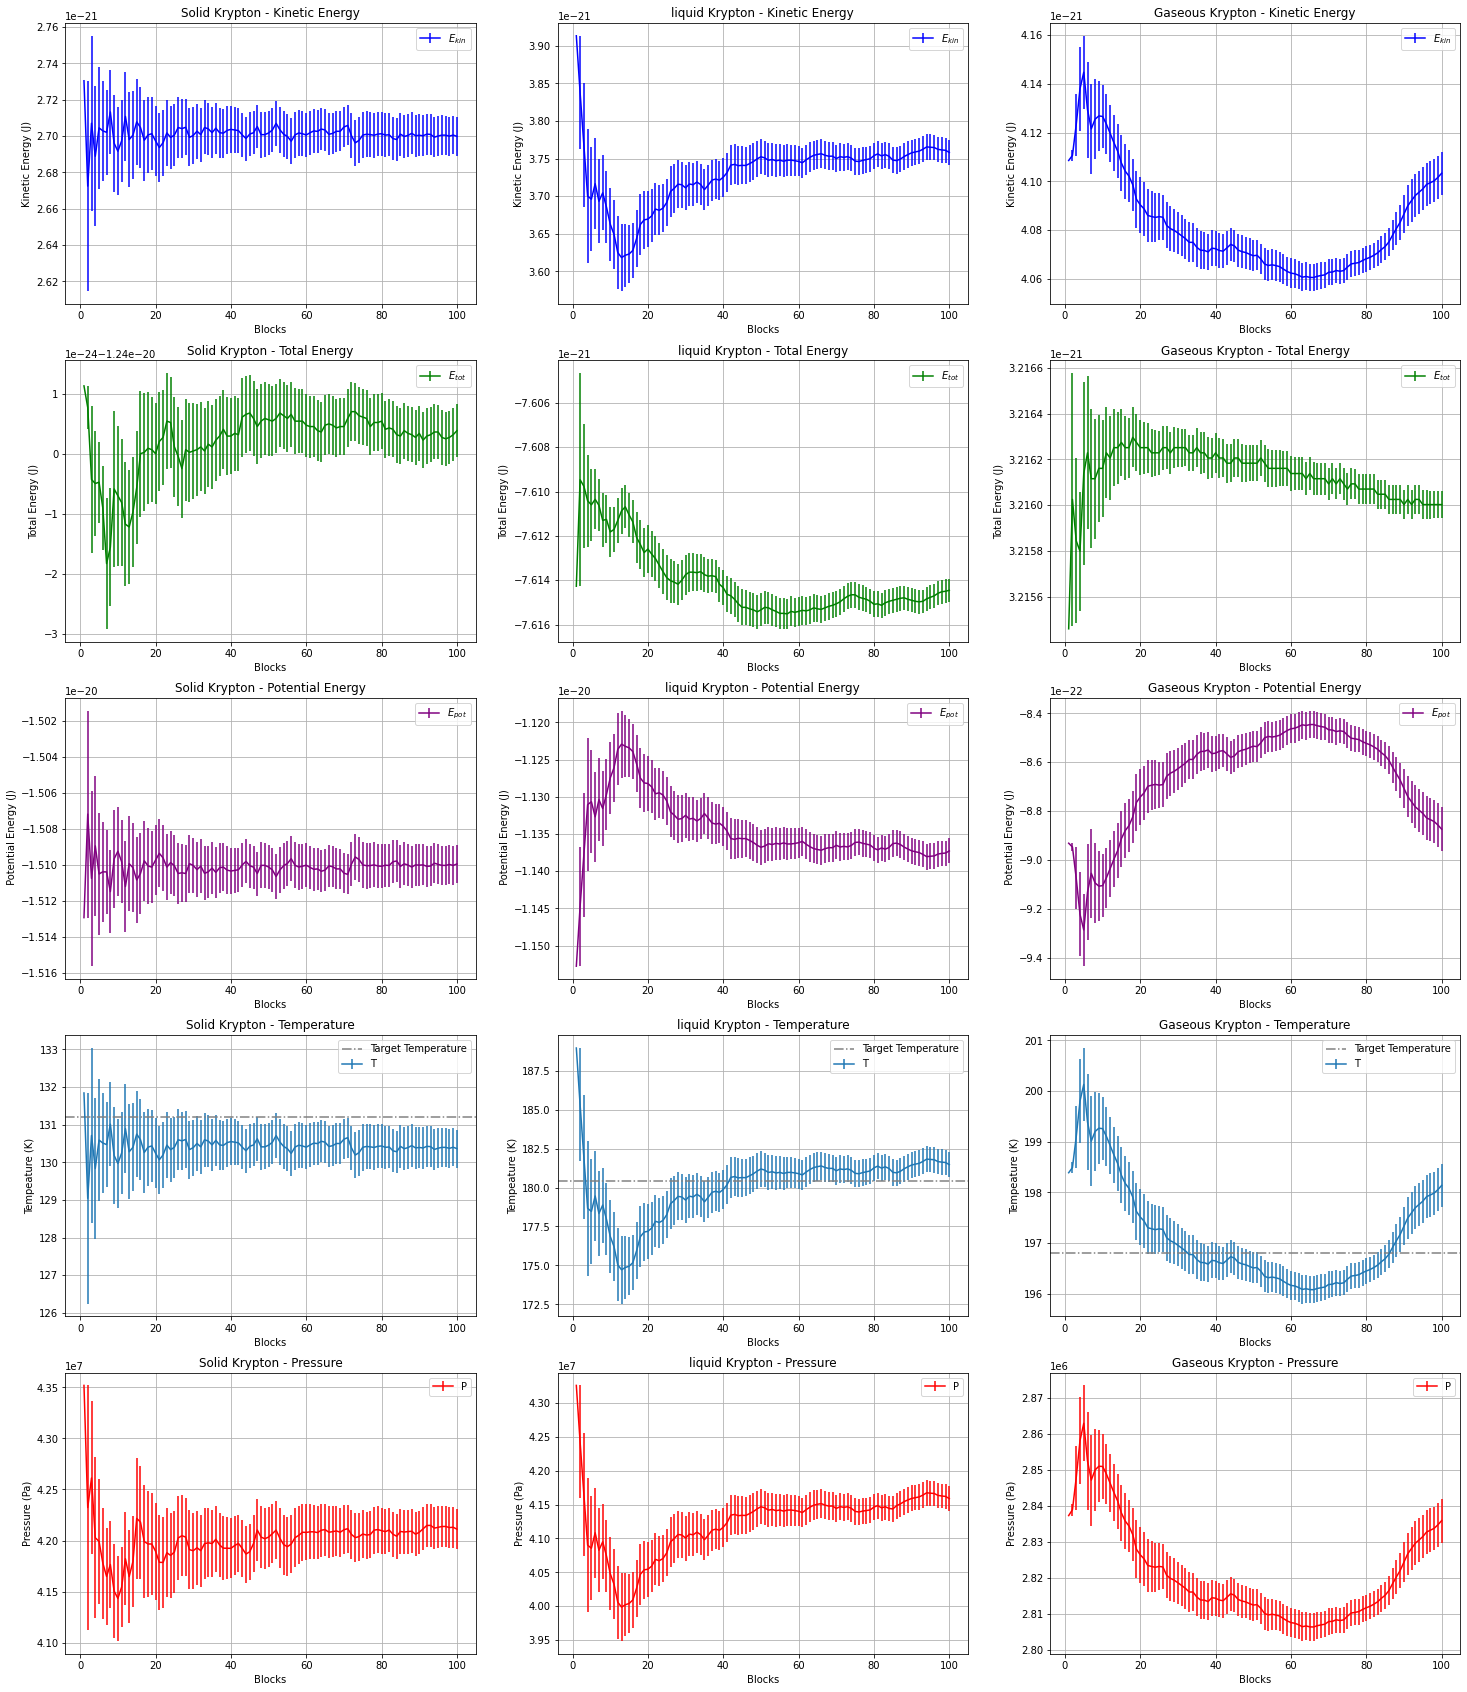

In [3]:
plt.figure(figsize=(25,30))

#================= solid krypton
ave_ekin, error_ekin= np.loadtxt("solid/ave_ekin.dat", usecols=(1,2), delimiter=' ', unpack='true', skiprows=120)
ave_etot, error_etot= np.loadtxt("solid/ave_etot.dat", usecols=(1,2), delimiter=' ', unpack='true', skiprows=120)
ave_epot, error_epot= np.loadtxt("solid/ave_epot.dat", usecols=(1,2), delimiter=' ', unpack='true', skiprows=120)
ave_temp, error_temp= np.loadtxt("solid/ave_temp.dat", usecols=(1,2), delimiter=' ', unpack='true', skiprows=120)
ave_pres, error_pres= np.loadtxt("solid/ave_pres.dat", usecols=(1,2), delimiter=' ', unpack='true', skiprows=120)

x=np.linspace(1, len(ave_ekin), len(ave_ekin))

plt.subplot(531)
plt.title("Solid Krypton - Kinetic Energy")
plt.errorbar(x, ave_ekin*epsilon_kr, yerr= error_ekin*epsilon_kr, label='$E_{kin}$', c='b')
plt.xlabel('Blocks')
plt.ylabel('Kinetic Energy (J)')
plt.legend()
plt.grid(True)

plt.subplot(534)
plt.title("Solid Krypton - Total Energy")
plt.errorbar(x, ave_etot*epsilon_kr, yerr= error_etot*epsilon_kr, label='$E_{tot}$', c='g')
plt.xlabel('Blocks')
plt.ylabel('Total Energy (J)')
plt.legend()
plt.grid(True)

plt.subplot(537)
plt.title("Solid Krypton - Potential Energy")
plt.errorbar(x, ave_epot*epsilon_kr, yerr= error_epot*epsilon_kr, label='$E_{pot}$', c='purple')
plt.xlabel('Blocks')
plt.ylabel(' Potential Energy (J)')
plt.legend()
plt.grid(True)

plt.subplot(5,3,10)
plt.title("Solid Krypton - Temperature")
plt.errorbar(x, ave_temp*epsilon_kr/k_b, yerr= error_temp*epsilon_kr/k_b, label='T')
plt.axhline(0.8*epsilon_kr/k_b, color='gray', linestyle='-.', label='Target Temperature')
plt.xlabel('Blocks')
plt.ylabel('Tempeature (K)')
plt.legend()
plt.grid(True)

plt.subplot(5,3,13)
plt.title("Solid Krypton - Pressure")
plt.errorbar(x, ave_pres*epsilon_kr/(sigma_kr**3), yerr= error_pres*epsilon_kr/(sigma_kr**3), label='P', c='r')
plt.xlabel('Blocks')
plt.ylabel('Pressure (Pa)')
plt.legend()
plt.grid(True)


#================= liquid Krypton
ave_ekin, error_ekin= np.loadtxt("liquid/ave_ekin.dat", usecols=(1,2), delimiter=' ', unpack='true', skiprows=120)
ave_etot, error_etot= np.loadtxt("liquid/ave_etot.dat", usecols=(1,2), delimiter=' ', unpack='true', skiprows=120)
ave_epot, error_epot= np.loadtxt("liquid/ave_epot.dat", usecols=(1,2), delimiter=' ', unpack='true', skiprows=120)
ave_temp, error_temp= np.loadtxt("liquid/ave_temp.dat", usecols=(1,2), delimiter=' ', unpack='true', skiprows=120)
ave_pres, error_pres= np.loadtxt("liquid/ave_pres.dat", usecols=(1,2), delimiter=' ', unpack='true', skiprows=120)

x=np.linspace(1, len(ave_ekin), len(ave_ekin))

plt.subplot(532)
plt.title("liquid Krypton - Kinetic Energy")
plt.errorbar(x, ave_ekin*epsilon_kr, yerr= error_ekin*epsilon_kr, label='$E_{kin}$', c='b')
plt.xlabel('Blocks')
plt.ylabel('Kinetic Energy (J)')
plt.legend()
plt.grid(True)

plt.subplot(535)
plt.title("liquid Krypton - Total Energy")
plt.errorbar(x, ave_etot*epsilon_kr, yerr= error_etot*epsilon_kr, label='$E_{tot}$', c='g')
plt.xlabel('Blocks')
plt.ylabel('Total Energy (J)')
plt.legend()
plt.grid(True)

plt.subplot(538)
plt.title("liquid Krypton - Potential Energy")
plt.errorbar(x, ave_epot*epsilon_kr, yerr= error_epot*epsilon_kr, label='$E_{pot}$', c='purple')
plt.xlabel('Blocks')
plt.ylabel(' Potential Energy (J)')
plt.legend()
plt.grid(True)

plt.subplot(5,3,11)
plt.title("liquid Krypton - Temperature")
plt.errorbar(x, ave_temp*epsilon_kr/k_b, yerr= error_temp*epsilon_kr/k_b, label='T')
plt.axhline(1.1*epsilon_kr/k_b, color='gray', linestyle='-.', label='Target Temperature')
plt.xlabel('Blocks')
plt.ylabel('Tempeature (K)')
plt.legend()
plt.grid(True)

plt.subplot(5,3,14)
plt.title("liquid Krypton - Pressure")
plt.errorbar(x, ave_pres*epsilon_kr/(sigma_kr**3), yerr= error_pres*epsilon_kr/(sigma_kr**3), label='P', c='r')
plt.xlabel('Blocks')
plt.ylabel('Pressure (Pa)')
plt.legend()
plt.grid(True)

#================= Gaseous Krypton
ave_ekin, error_ekin= np.loadtxt("Gas/ave_ekin.dat", usecols=(1,2), delimiter=' ', unpack='true', skiprows=120)
ave_etot, error_etot= np.loadtxt("Gas/ave_etot.dat", usecols=(1,2), delimiter=' ', unpack='true', skiprows=120)
ave_epot, error_epot= np.loadtxt("Gas/ave_epot.dat", usecols=(1,2), delimiter=' ', unpack='true', skiprows=120)
ave_temp, error_temp= np.loadtxt("Gas/ave_temp.dat", usecols=(1,2), delimiter=' ', unpack='true', skiprows=120)
ave_pres, error_pres= np.loadtxt("Gas/ave_pres.dat", usecols=(1,2), delimiter=' ', unpack='true', skiprows=120)

x=np.linspace(1, len(ave_ekin), len(ave_ekin))

plt.subplot(533)
plt.title("Gaseous Krypton - Kinetic Energy")
plt.errorbar(x, ave_ekin*epsilon_kr, yerr= error_ekin*epsilon_kr, label='$E_{kin}$', c='b')
plt.xlabel('Blocks')
plt.ylabel('Kinetic Energy (J)')
plt.legend()
plt.grid(True)

plt.subplot(536)
plt.title("Gaseous Krypton - Total Energy")
plt.errorbar(x, ave_etot*epsilon_kr, yerr= error_etot*epsilon_kr, label='$E_{tot}$', c='g')
plt.xlabel('Blocks')
plt.ylabel('Total Energy (J)')
plt.legend()
plt.grid(True)

plt.subplot(539)
plt.title("Gaseous Krypton - Potential Energy")
plt.errorbar(x, ave_epot*epsilon_kr, yerr= error_epot*epsilon_kr, label='$E_{pot}$', c='purple')
plt.xlabel('Blocks')
plt.ylabel(' Potential Energy (J)')
plt.legend()
plt.grid(True)

plt.subplot(5,3,12)
plt.title("Gaseous Krypton - Temperature")
plt.errorbar(x, ave_temp*epsilon_kr/k_b, yerr= error_temp*epsilon_kr/k_b, label='T')
plt.axhline(1.2*epsilon_kr/k_b, color='gray', linestyle='-.', label='Target Temperature')
plt.xlabel('Blocks')
plt.ylabel('Tempeature (K)')
plt.legend()
plt.grid(True)

plt.subplot(5,3,15)
plt.title("Gaseous Krypton - Pressure")
plt.errorbar(x, ave_pres*epsilon_kr/(sigma_kr**3), yerr= error_pres*epsilon_kr/(sigma_kr**3), label='P', c='r')
plt.xlabel('Blocks')
plt.ylabel('Pressure (Pa)')
plt.legend()
plt.grid(True)

plt.show()